In [1]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 55.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=153e2e0a29dc5d72bf51689bb1bb66b5a035a21724459f35f2f16545b012b10b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [2]:
!pip install markovify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 16.5 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18625 sha256=392afffe561247e1190d42809c8977b0dae8857a8225d8c05a6d577e10d23163
  Stored in directory: /root/.cache/pip/wheels/ca/8c/c5/41413e24c484f883a100c63ca7b3b0362b7c6f6eb6d7c9cc7f
Successfully built markovify


In [3]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pymorphy2
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import markovify
import nltk
from tqdm import tqdm_notebook as tqdm

In [5]:
data = pd.read_excel("/content/Массив для хакатона МИФИ.xlsx")
data.columns = ['title']

In [6]:
data.head()

,title
0,Процветание страны и её народов
1,Повышение материального благосостояния страны ...
2,Фундаментальные открытия в области энергоресур...
3,Профессиональное развитие
4,1. Создание новой технологической платформы/те...


In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
stop_words = set(stopwords.words('russian'))
stop_words.add('который')
stop_words.add('это')

In [9]:
# drop NaN elements
data = data.dropna()
data = data.astype(str)

In [10]:
lemmatizer = pymorphy2.MorphAnalyzer()

In [11]:
def preprocess(text: str) -> list[str]:
    """Preprocessing text
    :param text: str, text from answer
    :return: list of strings, text after lemmatizing
    """
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.parse(token)[0].normal_form for token in tokens if len(token) > 2]
    return tokens

In [12]:
# make corpus for model
corpus = [preprocess(text) for text in tqdm(data['title']) if len(preprocess(text))]

<ipython-input-12-2216454f597c>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  corpus = [preprocess(text) for text in tqdm(data['title']) if len(preprocess(text))]


  0%|          | 0/1994 [00:00<?, ?it/s]

In [13]:
dictionary = Dictionary(corpus)
corpus_bow = [dictionary.doc2bow(text) for text in tqdm(corpus)]

<ipython-input-13-161cc663c0eb>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  corpus_bow = [dictionary.doc2bow(text) for text in tqdm(corpus)]


  0%|          | 0/1978 [00:00<?, ?it/s]

In [15]:
num_cluster=10
lda_model = LdaModel(corpus=      corpus_bow, 
                     id2word=     dictionary, 
                     num_topics=  num_cluster,
                     passes=      50, 
                     random_state=100,
                     update_every=1,
                     chunksize=   100,
                     alpha=       'auto', 
                     iterations=  100
                     )

In [16]:
lda_model.print_topics()

[(0,
  '0.048*"аэс" + 0.046*"обеспечение" + 0.040*"качество" + 0.038*"строительство" + 0.035*"безопасность" + 0.031*"вдохновлять" + 0.030*"ядерный" + 0.022*"население" + 0.021*"электроэнергия" + 0.014*"вид"'),
 (1,
  '0.065*"росатом" + 0.062*"развитие" + 0.044*"отрасль" + 0.038*"сотрудник" + 0.036*"атомный" + 0.034*"страна" + 0.031*"мир" + 0.029*"уровень" + 0.024*"энергия" + 0.023*"мировой"'),
 (2,
  '0.056*"повышение" + 0.046*"жизнь" + 0.032*"результат" + 0.028*"улучшение" + 0.025*"рост" + 0.022*"работник" + 0.020*"мой" + 0.019*"плата" + 0.018*"заработный" + 0.018*"специалист"'),
 (3,
  '0.051*"лидер" + 0.033*"продвижение" + 0.030*"корпорация" + 0.029*"выход" + 0.024*"объект" + 0.024*"использование" + 0.022*"бизнес" + 0.022*"очень" + 0.022*"промышленность" + 0.020*"технологический"'),
 (4,
  '0.087*"процесс" + 0.046*"снижение" + 0.041*"срок" + 0.039*"продукция" + 0.026*"протекание" + 0.025*"себестоимость" + 0.020*"ответить" + 0.017*"первый" + 0.016*"сам" + 0.015*"оплата"'),
 (5,
  '0.

In [17]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame()
    for i, row in tqdm(enumerate(ldamodel[corpus])):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [18]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus_bow, texts=data['title'])
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

<ipython-input-17-e6eb44360686>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, row in tqdm(enumerate(ldamodel[corpus])):


0it [00:00, ?it/s]

<ipython-input-17-e6eb44360686>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-17-e6eb44360686>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-17-e6eb44360686>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-17-e6eb44360686>:9: FutureWarning: The frame.append method is deprecated and will be removed from panda

In [19]:
df_dominant_topic[df_dominant_topic.Keywords.isna()].to_csv('fail_clustering.csv')

In [20]:
df_dominant_topic=df_dominant_topic.dropna()

In [21]:
df_dominant_topic.to_csv('clustering.csv')

In [22]:
d = {}
for i in tqdm(range(num_cluster)):
    new_df=df_dominant_topic[df_dominant_topic.Dominant_Topic==i]
    z=new_df.Keywords.unique().tolist()
    out_str = " "
    out_str = out_str.join(z) 
    sz=out_str.split(', ')
    for j in range(len(sz)):
      d[sz[j]]=df_dominant_topic[df_dominant_topic.Dominant_Topic==i].Keywords.value_counts()[0]

<ipython-input-22-6f8c6cd3d879>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_cluster)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [23]:
from PIL import Image
cake_mask = np.array(Image.open('/content/rosAt.jpg'))

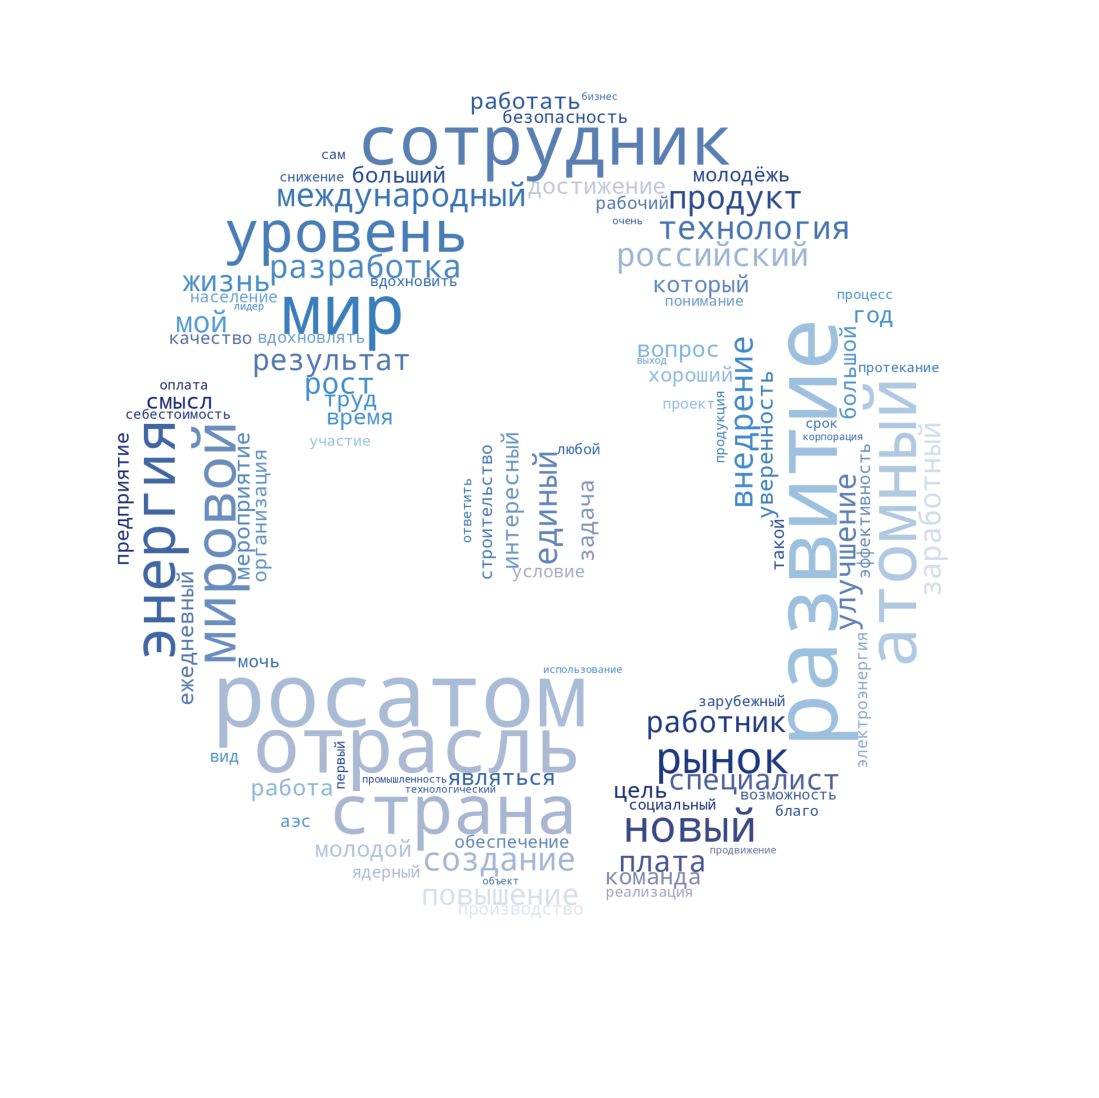

In [24]:
# make a cloud of words
cloud = WordCloud(stopwords=stop_words,
                  mask=cake_mask, 
                  contour_color='#2e3043', 
                  background_color='white',
                  mode="RGBA"
                  ).generate_from_frequencies(d)
plt.figure(figsize=(16,14))
image_colors = ImageColorGenerator(cake_mask)
plt.imshow(cloud.recolor(color_func=image_colors))
plt.axis('off')
plt.savefig("rosat_cw.png", format="png")
plt.show()

In [25]:
for i in tqdm(range(num_cluster)):  
  with open(f'cluster_{i}.txt', 'w') as f:
    ndarray = df_dominant_topic[df_dominant_topic.Dominant_Topic==i].Text.values
    f.write(str(df_dominant_topic[df_dominant_topic.Dominant_Topic==i].Keywords.unique()))
    f.write('\n')
    for row in ndarray:
        f.write(str(row))
        f.write('\n')

<ipython-input-25-508280cf9b2f>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_cluster)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [26]:
with open(f'model_answer.txt', 'w') as f_ans:
  for i in range(np.random.randint(num_cluster)):  
    with open(f'cluster_{i}.txt', 'r') as f:
      texta = f.read()
      text_model = markovify.Text(texta)
      txt_by_model = text_model.make_short_sentence(10000)
      if (txt_by_model is not None):
        f_ans.write(str(txt_by_model))
        f_ans.write('\n')